<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入库" data-toc-modified-id="导入库-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入库</a></span></li><li><span><a href="#读取文件" data-toc-modified-id="读取文件-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>读取文件</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#自动删除" data-toc-modified-id="自动删除-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>自动删除</a></span></li><li><span><a href="#手动修正" data-toc-modified-id="手动修正-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>手动修正</a></span></li><li><span><a href="#标签与数据集整合" data-toc-modified-id="标签与数据集整合-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>标签与数据集整合</a></span></li><li><span><a href="#填充重数" data-toc-modified-id="填充重数-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>填充重数</a></span></li></ul></li><li><span><a href="#数据变形" data-toc-modified-id="数据变形-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据变形</a></span><ul class="toc-item"><li><span><a href="#分割不同数据类型" data-toc-modified-id="分割不同数据类型-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>分割不同数据类型</a></span><ul class="toc-item"><li><span><a href="#创建一个df来准备添加嗷嗷多特征" data-toc-modified-id="创建一个df来准备添加嗷嗷多特征-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>创建一个df来准备添加嗷嗷多特征</a></span></li><li><span><a href="#时间变量" data-toc-modified-id="时间变量-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>时间变量</a></span><ul class="toc-item"><li><span><a href="#时间点和段" data-toc-modified-id="时间点和段-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>时间点和段</a></span></li><li><span><a href="#列出所有间的变量" data-toc-modified-id="列出所有间的变量-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>列出所有间的变量</a></span></li><li><span><a href="#小时变成分钟" data-toc-modified-id="小时变成分钟-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span>小时变成分钟</a></span></li><li><span><a href="#跨天转换" data-toc-modified-id="跨天转换-4.1.2.4"><span class="toc-item-num">4.1.2.4&nbsp;&nbsp;</span>跨天转换</a></span></li><li><span><a href="#加入时间差值" data-toc-modified-id="加入时间差值-4.1.2.5"><span class="toc-item-num">4.1.2.5&nbsp;&nbsp;</span>加入时间差值</a></span></li></ul></li><li><span><a href="#温度相关特征" data-toc-modified-id="温度相关特征-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>温度相关特征</a></span></li><li><span><a href="#温度相关统计特征" data-toc-modified-id="温度相关统计特征-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>温度相关统计特征</a></span></li><li><span><a href="#水耗相关特征" data-toc-modified-id="水耗相关特征-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>水耗相关特征</a></span></li></ul></li><li><span><a href="#合并所有特征" data-toc-modified-id="合并所有特征-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>合并所有特征</a></span></li></ul></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>训练模型</a></span></li></ul></div>

# 导入库 

In [148]:
import pandas as pd
import numpy as np
import warnings
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse  # 回归任务评估指标
warnings.simplefilter('ignore')  # 不显示报错

# 读取文件 

In [149]:
df_trn = pd.read_csv('jinnan_round1_train_20181227.csv', encoding='GB2312')
df_tst_a = pd.read_csv('jinnan_round1_testA_20181227.csv', encoding='GB2312')
df_tst_b = pd.read_csv('jinnan_round1_testB_20190121.csv', encoding='GB2312')

In [150]:
df_trn.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,2:30:00,NaN,15:30:00,...,65,11:30:00,45.0,11:30-13:00,14:00-15:30,9:00-10:00,800.0,0.15,400,0.879
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400,0.902
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400,0.936
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,...,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400,0.902
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,...,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.983


In [151]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   样本id    1396 non-null   object 
 1   A1      1396 non-null   int64  
 2   A2      42 non-null     float64
 3   A3      1354 non-null   float64
 4   A4      1396 non-null   int64  
 5   A5      1396 non-null   object 
 6   A6      1396 non-null   float64
 7   A7      150 non-null    object 
 8   A8      149 non-null    float64
 9   A9      1396 non-null   object 
 10  A10     1396 non-null   int64  
 11  A11     1396 non-null   object 
 12  A12     1396 non-null   int64  
 13  A13     1396 non-null   float64
 14  A14     1396 non-null   object 
 15  A15     1396 non-null   float64
 16  A16     1396 non-null   object 
 17  A17     1396 non-null   float64
 18  A18     1396 non-null   float64
 19  A19     1396 non-null   int64  
 20  A20     1396 non-null   object 
 21  A21     1393 non-null   float64
 22  

# 数据预处理

## 自动删除

## 手动修正

In [152]:
def train_abnormal_revise(data):
    df_trn = data.copy()
    df_trn.loc[(df_trn['A1'] == 200) & (df_trn['A3'] == 405), 'A1'] = 300
    df_trn['A5'] = df_trn['A5'].replace('1900/1/21 0:00', '21:00:00')
    df_trn['A5'] = df_trn['A5'].replace('1900/1/29 0:00', '14:00:00')
    df_trn['A9'] = df_trn['A9'].replace('1900/1/9 7:00', '23:00:00')
    df_trn['A9'] = df_trn['A9'].replace('700', '7:00:00')
    df_trn['A11'] = df_trn['A11'].replace(':30:00', '00:30:00')
    df_trn['A11'] = df_trn['A11'].replace('1900/1/1 2:30', '21:30:00')
    df_trn['A16'] = df_trn['A16'].replace('1900/1/12 0:00', '12:00:00')
    df_trn['A20'] = df_trn['A20'].replace('6:00-6:30分', '6:00-6:30')
    df_trn['A20'] = df_trn['A20'].replace('18:30-15:00', '18:30-19:00')
    df_trn['A22'] = df_trn['A22'].replace(3.5, np.nan)
    df_trn['A25'] = df_trn['A25'].replace('1900/3/10 0:00', 70).astype(int)
    df_trn['A26'] = df_trn['A26'].replace('1900/3/13 0:00', '13:00:00')
    df_trn['B1'] = df_trn['B1'].replace(3.5, np.nan)
    df_trn['B4'] = df_trn['B4'].replace('15:00-1600', '15:00-16:00')
    df_trn['B4'] = df_trn['B4'].replace('18:00-17:00', '16:00-17:00')
    df_trn['B4'] = df_trn['B4'].replace('19:-20:05', '19:05-20:05')
    df_trn['B9'] = df_trn['B9'].replace('23:00-7:30', '23:00-00:30')
    df_trn['B14'] = df_trn['B14'].replace(40, 400)
    return df_trn


def test_a_abnormal_revise(data):
    df_tst = data.copy()
    df_tst['A5'] = df_tst['A5'].replace('1900/1/22 0:00', '22:00:00')
    df_tst['A7'] = df_tst['A7'].replace('0:50:00', '21:50:00')
    df_tst['B14'] = df_tst['B14'].replace(785, 385)
    return df_tst


def train_abnormal_adjust(data):
    df_trn = data.copy()
    df_trn.loc[df_trn['样本id'] == 'sample_1894', 'A5'] = '14:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1234', 'A9'] = '0:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1020', 'A9'] = '18:30:00'

    df_trn.loc[df_trn['样本id'] == 'sample_1380', 'A11'] = '15:30:00'
    df_trn.loc[df_trn['样本id'] == 'sample_844', 'A11'] = '10:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1348', 'A11'] = '17:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_25', 'A11'] = '00:30:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1105', 'A11'] = '4:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_313', 'A11'] = '15:30:00'

    df_trn.loc[df_trn['样本id'] == 'sample_291', 'A14'] = '19:30:00'

    df_trn.loc[df_trn['样本id'] == 'sample_1398', 'A16'] = '11:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1177', 'A20'] = '19:00-20:00'

    df_trn.loc[df_trn['样本id'] == 'sample_71', 'A20'] = '16:20-16:50'
    df_trn.loc[df_trn['样本id'] == 'sample_14', 'A20'] = '18:00-18:30'
    df_trn.loc[df_trn['样本id'] == 'sample_69', 'A20'] = '6:10-6:50'
    df_trn.loc[df_trn['样本id'] == 'sample_1500', 'A20'] = '23:00-23:30'

    df_trn.loc[df_trn['样本id'] == 'sample_1524', 'A24'] = '15:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1524', 'A26'] = '15:30:00'

    df_trn.loc[df_trn['样本id'] == 'sample_1046', 'A28'] = '18:00-18:30'

    df_trn.loc[df_trn['样本id'] == 'sample_1230', 'B5'] = '17:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_97', 'B7'] = '1:00:00'
    df_trn.loc[df_trn['样本id'] == 'sample_752', 'B9'] = '11:00-14:00'

    df_trn.loc[df_trn['样本id'] == 'sample_609', 'B11'] = '11:00-12:00'
    df_trn.loc[df_trn['样本id'] == 'sample_643', 'B11'] = '12:00-13:00'
    df_trn.loc[df_trn['样本id'] == 'sample_1164', 'B11'] = '5:00-6:00'
    return df_trn


def test_a_abnormal_adjust(data):
    df_tst = data.copy()
    df_tst.loc[df_tst['样本id'] == 'sample_919', 'A9'] = '19:50:00'
    return df_tst


def test_b_abnormal_adjust(data):
    df_tst = data.copy()
    df_tst.loc[df_tst['样本id'] == 'sample_566', 'A5'] = '18:00:00'
    df_tst.loc[df_tst['样本id'] == 'sample_40', 'A20'] = '5:00-5:30'
    df_tst.loc[df_tst['样本id'] == 'sample_531', 'B5'] = '1:00'
    return df_tst

In [153]:
df_trn = train_abnormal_revise(df_trn).pipe(train_abnormal_adjust)
df_tst_a = test_a_abnormal_revise(df_tst_a).pipe(test_a_abnormal_adjust)
df_tst_b = test_b_abnormal_adjust(df_tst_b)

## 标签与数据集整合

In [154]:
df_trn= df_trn.copy()
df_tst=df_tst_a.copy()
df_target = df_trn['收率']
del df_trn['收率']
df_trn_tst = df_trn.append(df_tst, ignore_index=False).reset_index(drop=True) # 把训练集和数据集 合并

## 填充重数

In [155]:
for _df in [df_trn, df_tst, df_trn_tst]:
    _df['A3'] = _df['A3'].fillna(405)

# 数据变形

## 分割不同数据类型

In [156]:
## 写一个遍历，如果数据是inint64或者float64类型放在一个集合里，如果是object类型放在一个集合里
class_object, class_I_F = [],[] 

for i in df_trn:
    if str(df_trn[i].dtype) =='object':
        class_object.append(i)
    elif 'int' in str(df_trn[i].dtype) or str(df_trn[i].dtype) =='float64':
        class_I_F.append(i)
    else:
        print('there is another dtype')
        print((i,str(df_trn[i].dtype)))
        continue

In [157]:
print(class_object)
print(class_I_F )

['样本id', 'A5', 'A7', 'A9', 'A11', 'A14', 'A16', 'A20', 'A24', 'A26', 'A28', 'B4', 'B5', 'B7', 'B9', 'B10', 'B11']
['A1', 'A2', 'A3', 'A4', 'A6', 'A8', 'A10', 'A12', 'A13', 'A15', 'A17', 'A18', 'A19', 'A21', 'A22', 'A23', 'A25', 'A27', 'B1', 'B2', 'B3', 'B6', 'B8', 'B12', 'B13', 'B14']


### 创建一个df来准备添加嗷嗷多特征

In [158]:
raw = df_trn_tst.copy()
df = pd.DataFrame(raw['样本id'])    ## 拿出拼接的特征ID
df.head()

,样本id
0,sample_1528
1,sample_1698
2,sample_639
3,sample_483
4,sample_617


### 时间变量

In [159]:
##### 时间变量搜索上面的object集合，如果，拥有时间的特点，就形成搜索出这些变量。
time_period, time_point = [], []  # 时间段, 时间点
for num,i in enumerate(class_object):
    for string1 in df_trn[i]:
        if (1):
            if (":" in string1 and '-' in string1 and i not in time_period):
#                 print((i,string1))
                time_period.append(i)
                break
            elif (":" in string1 and '-' not in string1 and i not in time_point):
#                 print((i, string1))
                time_point.append(i)
                break
            else:
                break
        else:
            break

In [160]:
print(time_period)
print(time_point)

['A20', 'A28', 'B4', 'B9', 'B10', 'B11']
['A5', 'A7', 'A9', 'A11', 'A14', 'A16', 'A24', 'A26', 'B5', 'B7']


#### 时间点和段

In [161]:
# with open('jinnan_round1_train_20181227.csv', 'r') as f:
#     last_last_pos = None
#     last_pos = f.tell()
#     line = f.readline() # 读取
#     line_num = 0  # 所在I行为1
#     time_period,time_point = [],[] #时间段, 时间点
#     while line:
#         line_num = line_num+1
#         if (line_num == 1):
#             dict_xls = line.split(',')
#         elif(line_num == 2):
#             # print(line)
#             for col_i, string1 in enumerate(line.split(',')):
#                 if(":" in string1 and '-' in string1 and dict_xls[col_i] not in time_period):
#                     # print((dict_xls[col_i], line_num,string1))
#                     time_period.append(dict_xls[col_i])
#                 elif(":" in string1 and '-' not in string1 and dict_xls[col_i] not in time_point):
#                     # print((dict_xls[col_i], line_num, string1))
#                     time_period.append(dict_xls[col_i])
#                 else:
#                     continue
#         else:
#             break
#         last_last_pos = last_pos
#         last_pos = f.tell()
#         line = f.readline()

In [162]:
df_trn.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,2:30:00,NaN,15:30:00,...,8:00:00,65,11:30:00,45.0,11:30-13:00,14:00-15:30,9:00-10:00,800.0,0.15,400
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,23:00:00,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,...,15:30:00,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,...,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420


In [163]:

# 同时对训练和测试集进行相同处理
for _df in [df_trn_tst, df_trn, df_tst]:
    # 添加列名标记
    _df.rename(columns={_col: _col + '_t' for _col in time_point},
               inplace=True)
    # 遍历所有持续时间相关列例如21:00-21:30
    for _col in time_period:
        # 取到当前列的索引
        _idx_col = _df.columns.tolist().index(_col)
        # 添加新的一列，表示起始时间
        _df.insert(_idx_col + 1, ### _idx_col + 1索引加一，表示在他的后面插入一列， 
                   _col + '_at',   ####_col + '_at 这一列的列明
                   _df[_col].str.split('-').str[0]) ####_加入的东西 str[0]是“-”前面的内容
        # 添加新的一列，表示终止时间 
        _df.insert(_idx_col + 2, _col + '_bt',   
                   _df[_col].str.split('-').str[1])
        # 删除持续时间
        del _df[_col]
        time_point = time_point + [_col + '_at', _col + '_bt']
df_trn_tst.head()

,样本id,A1,A2,A3,A4,A5_t,A6,A7_t,A8,A9_t,...,B8,B9_at,B9_bt,B10_at,B10_bt,B11_at,B11_bt,B12,B13,B14
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,2:30:00,NaN,15:30:00,...,45.0,11:30,13:00,14:00,15:30,9:00,10:00,800.0,0.15,400
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,45.0,6:00,7:30,7:30,9:00,9:00,10:00,1200.0,0.15,400
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,...,45.0,1:00,2:30,2:30,4:00,4:00,5:00,1200.0,0.15,400
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,...,45.0,19:00,20:30,21:30,23:00,NaN,NaN,800.0,0.15,400
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,...,45.0,9:00,10:30,10:30,12:00,12:00,13:00,1200.0,0.15,420


In [164]:
time_period

['A20', 'A28', 'B4', 'B9', 'B10', 'B11']

In [165]:
time_point

['A5',
 'A7',
 'A9',
 'A11',
 'A14',
 'A16',
 'A24',
 'A26',
 'B5',
 'B7',
 'A20_at',
 'A20_bt',
 'A28_at',
 'A28_bt',
 'B4_at',
 'B4_bt',
 'B9_at',
 'B9_bt',
 'B10_at',
 'B10_bt',
 'B11_at',
 'B11_bt',
 'A20_at',
 'A20_bt',
 'A28_at',
 'A28_bt',
 'B4_at',
 'B4_bt',
 'B9_at',
 'B9_bt',
 'B10_at',
 'B10_bt',
 'B11_at',
 'B11_bt',
 'A20_at',
 'A20_bt',
 'A28_at',
 'A28_bt',
 'B4_at',
 'B4_bt',
 'B9_at',
 'B9_bt',
 'B10_at',
 'B10_bt',
 'B11_at',
 'B11_bt']

#### 列出所有间的变量

In [166]:
cols_timer = list(filter(lambda x: x.endswith('t'), df_trn_tst.columns)) ### T_含有时间的数值
cols_timer

['A5_t',
 'A7_t',
 'A9_t',
 'A11_t',
 'A14_t',
 'A16_t',
 'A20_at',
 'A20_bt',
 'A24_t',
 'A26_t',
 'A28_at',
 'A28_bt',
 'B4_at',
 'B4_bt',
 'B5_t',
 'B7_t',
 'B9_at',
 'B9_bt',
 'B10_at',
 'B10_bt',
 'B11_at',
 'B11_bt']

#### 小时变成分钟

In [167]:
def time_to_min(x):
    if x is np.nan:
        return np.nan
    else:
        x = x.replace(';', ':').replace('；', ':')
        x = x.replace('::', ':').replace('"', ':')
        h, m = x.split(':')[:2]
        h = 0 if not h else h
        m = 0 if not m else m
        return int(h)*60 + int(m)

In [168]:
for _df in [df_trn_tst, df_trn, df_tst]:
    for _col in cols_timer:
        _df[_col] = _df[_col].map(time_to_min)

In [169]:
df_trn.head()

,样本id,A1,A2,A3,A4,A5_t,A6,A7_t,A8,A9_t,...,B8,B9_at,B9_bt,B10_at,B10_bt,B11_at,B11_bt,B12,B13,B14
0,sample_1528,300,NaN,405.0,700,810,38.0,150.0,NaN,930,...,45.0,690,780,840.0,930.0,540.0,600.0,800.0,0.15,400
1,sample_1698,300,NaN,405.0,700,840,29.0,NaN,NaN,960,...,45.0,360,450,450.0,540.0,540.0,600.0,1200.0,0.15,400
2,sample_639,300,NaN,405.0,700,840,29.0,NaN,NaN,960,...,45.0,60,150,150.0,240.0,240.0,300.0,1200.0,0.15,400
3,sample_483,300,NaN,405.0,700,90,38.0,NaN,NaN,180,...,45.0,1140,1230,1290.0,1380.0,NaN,NaN,800.0,0.15,400
4,sample_617,300,NaN,405.0,700,1320,29.0,NaN,NaN,0,...,45.0,540,630,630.0,720.0,720.0,780.0,1200.0,0.15,420


#### 跨天转换

In [170]:

def duration_outer(series1, series2):
    duration = series1 - series2
    duration = np.where(duration < 0, duration + 24*60, duration)
    duration = np.where(duration > 12*60, 24*60 - duration, duration)
    duration = np.where(duration > 6*60, 12*60 - duration, duration)
    return duration

#### 加入时间差值

In [171]:
raw = df_trn_tst.copy()
df = pd.DataFrame(raw['样本id'])
# 加热过程
df['P1_S1_A5_0T'] = raw['A5_t']  # 初始时刻  在有样本id的情况下，加入a6_t
df['P1_S2_A9_2T'] = raw['A9_t']  # 初始时刻
df['P1_T1_T0_D'] = duration_outer(raw['A7_t'], raw['A5_t'])
# 初次测温时间差
df['P1_T2_T1_D'] = duration_outer(raw['A9_t'], raw['A7_t'])
# 二次测温时间差
df['P1_T2_T0_K_D'] = duration_outer(raw['A9_t'], raw['A5_t'])
# 开始加热至沸腾时间差

# 水解过程
df['P2_S1_A11_3T'] = raw['A11_t']  # 水解开始时刻
df['P2_S1_A16_5T'] = raw['A16_t']  # 水解结束时刻

df['P2_T3_T0_K_D'] = duration_outer(raw['A11_t'], raw['A5_t'])
# 开始加热至投料时间差
df['P2_T3_T2_K_D'] = duration_outer(raw['A11_t'], raw['A9_t'])
# 恒温至投料投料时间差
# df['P2_T4_T3_D'] = raw['A14_t'] - raw['A11_t']  # 水解初次测温时间差
# df['P2_T5_T4_D'] = raw['A16_t'] - raw['A14_t']  # 水解结束时间差
df['P2_T5_T3_K_D'] = duration_outer(raw['A16_t'], raw['A11_t'])
# 水解时间差

# 脱色过程
df['P3_S1_A20_6T'] = raw['A20_at']  # 中和开始时刻
df['P3_S2_A25_7T'] = raw['A24_t']  # 保温时刻

df['P3_T6_T5_K_D'] = duration_outer(raw['A20_at'], raw['A16_t'])
# 水解结束至中和间歇时间
df['P3_T6_T6_K_D'] = duration_outer(raw['A20_bt'], raw['A20_at'])
# 酸碱度中和时间
df['P3_T7_T6_D'] = duration_outer(raw['A24_t'], raw['A20_bt'])
# 中和结束至脱色间歇时间
df['P3_T8_T7_K_D'] = duration_outer(raw['A26_t'], raw['A24_t'])
# 脱色保温时间
df['P3_T9_T8_D'] = duration_outer(raw['A28_at'], raw['A26_t'])
# 脱色至抽滤间歇时间
df['P3_T9_T9_K_D'] = duration_outer(raw['A28_bt'], raw['A28_at'])
# 抽滤时间
df['P3_T9_T5_1D'] = duration_outer(raw['A28_bt'], raw['A16_t'])
df['P3_T9_T6_2D'] = duration_outer(raw['A28_bt'], raw['A20_at'])
# 脱色总时间

# 结晶过程
df['P4_S1_B4_10T'] = raw['B4_at']  # 酸化开始时刻
df['P4_S2_B5_11T'] = raw['B5_t']  # 结晶开始时刻
df['P4_S3_B7_12T'] = raw['B7_t']  # 结晶结束时刻

df['P4_T10_T9_D'] = duration_outer(raw['B4_at'], raw['A28_bt'])
# 抽滤结束至酸化间歇时间
df['P4_T10_T10_K_D'] = duration_outer(raw['B4_bt'], raw['B4_at'])
# 酸化时间
df['P4_T11_T10_K_D'] = duration_outer(raw['B5_t'], raw['B4_bt'])
# 酸化至结晶间歇时间
df['P4_T12_T11_K_D'] = duration_outer(raw['B7_t'], raw['B5_t'])
# 自然结晶时间
df['P4_T12_T9_1D'] = duration_outer(raw['B7_t'], raw['A28_bt'])
df['P4_T12_T10_2D'] = duration_outer(raw['B7_t'], raw['B4_at'])
# 结晶总时间

# 甩滤过程
df['P5_S1_B9_13T'] = raw['B9_at']  # 甩滤开始时刻
df['P5_S3_B12_15T'] = np.where(
    raw['B11_bt'].isnull(),
    np.where(raw['B10_bt'].isnull(), raw['B9_bt'], raw['B10_bt']),
    raw['B11_bt'])  # 甩滤结束时刻
df['P5_T13_T12_D'] = duration_outer(raw['B9_at'], raw['B7_t'])
# 酸化结束至甩滤间歇时间
df['P5_T13_T13_K_D'] = duration_outer(raw['B9_bt'], raw['B9_at'])
# 基本甩滤时间
df['P5_T14_T13_D'] = duration_outer(raw['B10_at'], raw['B9_bt'])
# 基本甩滤至补充甩滤1间歇时间
df['P5_T14_T14_K_D'] = duration_outer(raw['B10_bt'], raw['B10_at'])
# 补充甩滤1时间
df['P5_T15_T14_D'] = duration_outer(raw['B11_at'], raw['B10_bt'])
# 补充甩滤1至补充甩滤2间歇时间
df['P5_T15_T13_K_D'] = duration_outer(raw['B11_bt'], raw['B11_at'])
# 补充甩滤2时间
df['P5_T15_T13_1D'] = \
    df[['P5_T13_T13_K_D', 'P5_T14_T14_K_D', 'P5_T13_T13_K_D']].sum(axis=1)
df['P5_T15_T12_2D'] = duration_outer(
    df['P5_S3_B12_15T'], df['P4_S3_B7_12T'])
df['P5_T15_T12_3D'] = duration_outer(
    df['P5_S3_B12_15T'], df['P5_S1_B9_13T'])
# 总甩滤时间

# 总流程时长
df['P5_T15_T1_4D'] = \
    df[['P5_T15_T12_2D', 'P4_T12_T9_1D', 'P3_T9_T5_1D',
        'P2_T3_T0_K_D', 'P2_T5_T3_K_D']].sum(axis=1)
_funcs = ['mean', 'std', 'sum']
for _func in _funcs:
    df[f'P5__D_{_func}'] = \
        df[[_f for _f in df.columns if _f.endswith('_D')]].\
            abs().agg(_func, axis=1)
    df[f'P5_K_D_{_func}'] = \
        df[[_f for _f in df.columns if _f.endswith('_K_D')]]. \
            abs().agg(_func, axis=1)
    df[f'P5__D_{_func}'] = \
        df[[_f for _f in df.columns if _f.endswith('D')]]. \
            abs().agg(_func, axis=1)
df_duration = df.set_index('样本id')   #根据索引合并

In [172]:
df_duration.head()

,P1_S1_A5_0T,P1_S2_A9_2T,P1_T1_T0_D,P1_T2_T1_D,P1_T2_T0_K_D,P2_S1_A11_3T,P2_S1_A16_5T,P2_T3_T0_K_D,P2_T3_T2_K_D,P2_T5_T3_K_D,...,P5_T15_T13_1D,P5_T15_T12_2D,P5_T15_T12_3D,P5_T15_T1_4D,P5__D_mean,P5_K_D_mean,P5__D_std,P5_K_D_std,P5__D_sum,P5_K_D_sum
样本id,,,,,,,,,,,,,,,,,,,,,
sample_1528,810,930,60.0,60.0,120,990,1110,180,60,120,...,270.0,90.0,90.0,690.0,128.000000,87.857143,140.255924,61.666419,3840.0,1230.0
sample_1698,840,960,NaN,NaN,120,1020,1140,180,60,120,...,270.0,240.0,240.0,960.0,136.071429,90.000000,188.588113,76.258669,3810.0,1260.0
sample_639,840,960,NaN,NaN,120,1020,1140,180,60,120,...,270.0,240.0,240.0,900.0,123.214286,75.000000,173.654693,49.575118,3450.0,1050.0
sample_483,90,180,NaN,NaN,90,240,360,150,60,120,...,270.0,300.0,240.0,990.0,158.076923,73.846154,195.448596,46.822086,4110.0,960.0
sample_617,1320,0,NaN,NaN,120,60,180,180,60,120,...,270.0,240.0,240.0,900.0,123.214286,77.142857,173.846539,48.107024,3450.0,1080.0


### 温度相关特征

In [173]:
# 加热过程
df['P1_S1_A6_0C'] = raw['A6']  # 容器初始温度
df['P1_S2_A8_1C'] = raw['A8']  # 首次测温温度
df['P1_S3_A10_2C'] = raw['A10']  # 准备水解温度
df['P1_C1_C0_D'] = raw['A8'] - raw['A6']  # 测温温差
df['P1_C2_C0_D'] = raw['A10'] - raw['A6']  # 初次沸腾温差

# 水解过程
df['P2_S1_A12_3C'] = raw['A12']  # 水解开始温度
df['P2_S2_A15_4C'] = raw['A15']  # 水解过程测温温度
df['P2_S3_A17_5C'] = raw['A17']  # 水解结束温度
df['P2_C3_C0_D'] = raw['A12'] - raw['A6']  # 水解开始与初始温度温差
df['P2_C3_C2_D'] = raw['A12'] - raw['A10']  # 水解开始前恒温温差
df['P2_C4_C3_D'] = raw['A15'] - raw['A12']  # 水解过程中途温差
df['P2_C5_C4_D'] = raw['A17'] - raw['A15']  # 水解结束中途温差
df['P2_C5_C3_KD'] = raw['A17'] - raw['A12']  # 水解起止温差

# 脱色过程
df['P3_S2_A25_7C'] = raw['A25']  # 脱色保温开始温度
df['P3_S3_A27_8C'] = raw['A27']  # 脱色保温结束温度
df['P3_C7_C5_D'] = raw['A25'] - raw['A17']  # 降温温差
df['P3_C8_C7_KD'] = raw['A27'] - raw['A25']  # 保温温差

# 结晶过程
df['P4_S2_B6_11C'] = raw['B6']  # 结晶开始温度
df['P4_S3_B8_12C'] = raw['B8']  # 结晶结束温度
df['P4_C11_C8_D'] = raw['B6'] - raw['A27']  # 脱色结束到结晶温差
df['P4_C12_C11_KD'] = raw['B8'] - raw['B6']  # 结晶温差

### 温度相关统计特征

In [174]:
_funcs = ['mean', 'std', 'sum']
# 遍历每一种统计指标
for _func in _funcs:
    # 对每一个样本计算各项指标
    df[f'P2_C2-C5_{_func}'] = raw[['A10', 'A12', 'A15', 'A17']].\
        agg(_func, axis=1)  # 沸腾过程温度
    df[f'P2_D3-D5_{_func}'] = \
        df[[f'P2_C{i}_C{i-1}_D' for i in range(3, 6)]].\
            abs().agg(_func, axis=1)  # 沸腾过程绝对温差
    df[f'P2_C1-C12_KD_ABS_{_func}'] = \
        df[[_f for _f in df.columns if _f.endswith('KD')]].\
            abs().agg(_func, axis=1)  # 关键过程绝对温差
    df[f'P2_C1-C12_D_{_func}'] = \
        df[[_f for _f in df.columns if _f.endswith('D')]].\
            abs().agg(_func, axis=1)  # 所有过程绝对温差
    df[f'P2_LARGE_KD_{_func}'] = \
        df[['P2_C3_C0_D', 'P3_C7_C5_D', 'P4_C12_C11_KD']].\
            abs().agg(_func, axis=1)  # 大温差绝对温差

In [175]:
df.head()

,样本id,P1_S1_A5_0T,P1_S2_A9_2T,P1_T1_T0_D,P1_T2_T1_D,P1_T2_T0_K_D,P2_S1_A11_3T,P2_S1_A16_5T,P2_T3_T0_K_D,P2_T3_T2_K_D,...,P2_C2-C5_std,P2_D3-D5_std,P2_C1-C12_KD_ABS_std,P2_C1-C12_D_std,P2_LARGE_KD_std,P2_C2-C5_sum,P2_D3-D5_sum,P2_C1-C12_KD_ABS_sum,P2_C1-C12_D_sum,P2_LARGE_KD_sum
0,sample_1528,810,930,60.0,60.0,120,990,1110,180,60,...,1.707825,0.57735,9.643651,130.582224,23.245071,409.0,4.0,27.0,4031.0,113.0
1,sample_1698,840,960,NaN,NaN,120,1020,1140,180,60,...,1.707825,0.57735,17.785762,169.470743,25.890796,413.0,4.0,44.0,4036.0,134.0
2,sample_639,840,960,NaN,NaN,120,1020,1140,180,60,...,1.290994,0.00000,18.009257,155.658442,25.514702,414.0,3.0,43.0,3676.0,135.0
3,sample_483,90,180,NaN,NaN,90,240,360,150,60,...,1.707825,0.57735,9.165151,177.019672,22.479620,409.0,4.0,30.0,4317.0,118.0
4,sample_617,1320,0,NaN,NaN,120,60,180,180,60,...,1.707825,0.57735,17.785762,155.799019,25.890796,413.0,4.0,44.0,3676.0,134.0


得到温度相关特征

In [176]:
df_temperature = df.set_index('样本id')

In [177]:
df_temperature.head()

,P1_S1_A5_0T,P1_S2_A9_2T,P1_T1_T0_D,P1_T2_T1_D,P1_T2_T0_K_D,P2_S1_A11_3T,P2_S1_A16_5T,P2_T3_T0_K_D,P2_T3_T2_K_D,P2_T5_T3_K_D,...,P2_C2-C5_std,P2_D3-D5_std,P2_C1-C12_KD_ABS_std,P2_C1-C12_D_std,P2_LARGE_KD_std,P2_C2-C5_sum,P2_D3-D5_sum,P2_C1-C12_KD_ABS_sum,P2_C1-C12_D_sum,P2_LARGE_KD_sum
样本id,,,,,,,,,,,,,,,,,,,,,
sample_1528,810,930,60.0,60.0,120,990,1110,180,60,120,...,1.707825,0.57735,9.643651,130.582224,23.245071,409.0,4.0,27.0,4031.0,113.0
sample_1698,840,960,NaN,NaN,120,1020,1140,180,60,120,...,1.707825,0.57735,17.785762,169.470743,25.890796,413.0,4.0,44.0,4036.0,134.0
sample_639,840,960,NaN,NaN,120,1020,1140,180,60,120,...,1.290994,0.00000,18.009257,155.658442,25.514702,414.0,3.0,43.0,3676.0,135.0
sample_483,90,180,NaN,NaN,90,240,360,150,60,120,...,1.707825,0.57735,9.165151,177.019672,22.479620,409.0,4.0,30.0,4317.0,118.0
sample_617,1320,0,NaN,NaN,120,60,180,180,60,120,...,1.707825,0.57735,17.785762,155.799019,25.890796,413.0,4.0,44.0,3676.0,134.0


### 水耗相关特征

In [178]:
na_value=405

df_trn_tst = df_trn_tst.copy()
df = pd.DataFrame(raw['样本id'])
# 耗水
df['P2_W_1M'] = raw['A4']
df['P2_W_2M'] = raw['A19']
# 耗盐酸
df['P3_H_1M'] = raw['A21'].fillna(50)
df['P4_H_2M'] = raw['B1'].fillna(320)
# 氢氧化钠
df['P2_N_1M'] = raw['A3'].fillna(na_value)
# 4-氰基吡啶
df['P2_C_1M'] = raw['A1']

df['P5_W_3M'] = raw['B12'].fillna(1200)
df['P5_W_1M'] = df['P2_W_1M'] + df['P2_W_2M']
df['P5_W_3M'] = df['P2_W_1M'] + df['P2_W_2M'] + df['P5_W_3M']
df['P5_H_1M'] = df['P3_H_1M'] + df['P4_H_2M']
df['P5_M_0M'] = raw['A1'] + df['P2_N_1M'] + df['P5_W_1M'] + df['P4_H_2M']
df['P5_M_1M'] = df['P5_M_0M'] + df['P5_W_3M']
df['P5_M_2M'] = df['P5_M_1M'] + df['P3_H_1M']
# 理论产出
df['P5_O_1M'] = raw['B14']
df['P5_O_5M'] = raw['B14'].replace(418, 420).replace(405, 400).\
    replace(395, 390).replace(392, 390).replace(387, 380).\
    replace(385, 380).replace(370, 360).replace(350, 360).\
    replace(350, 360).replace(340, 360).replace(290, 280).\
    replace(260, 280).replace(256, 280)
_fs = [_f for _f in df.columns if _f.endswith('M')]
for _f in _fs[:-2]:
    df[f'{_f}_P5_O_1M_R'] = df['P5_O_1M'] / df[_f]
    df[f'{_f}_P5_O_5M_R'] = df['P5_O_5M'] / df[_f]
for i in range(len(_fs[:6])):
    _f, _sub_fs = _fs[i], _fs[(i+1):6]
    for _f_div in _sub_fs:
        df[f'{_f}_{_f_div}_R'] = df[_f] / df[_f_div]
df_materials = df.set_index('样本id')    #根据索引合并

In [179]:
raw = df_trn_tst.copy()
df = pd.DataFrame(raw['样本id'])
df['P5_NOT_NUM_N'] = raw.iloc[:, 1:-1].notnull().sum(axis=1)
df['P5_PH_1N'] = raw['A22']
df['P5_PH_2N'] = raw['A23']
df['P5_PH_2N'] = raw['B2']
df['P5_A7_1N'] = raw['A7_t'].isnull().astype(int)
df['P5_O_2M'] = (raw['B14'] <= 360).astype(int)
df['P5_1_3M'] = raw['B13']
df_interact = df.set_index('样本id')   #根据索引合并

In [180]:
df_interact.head()

,P5_NOT_NUM_N,P5_PH_1N,P5_PH_2N,P5_A7_1N,P5_O_2M,P5_1_3M
样本id,,,,,,
sample_1528,45,9.0,3.5,0,0,0.15
sample_1698,44,9.0,3.5,1,0,0.15
sample_639,44,9.0,3.5,1,0,0.15
sample_483,42,10.0,3.5,1,0,0.15
sample_617,44,9.0,3.5,1,0,0.15


## 合并所有特征

In [181]:
### 合并object 集合和 init float 集合


In [182]:
df_feature = pd.concat([df_materials, df_duration, df_temperature, df_interact], axis=1).reset_index()

In [183]:
df_trn = df_feature.iloc[:len(df_trn)].reset_index(drop=True)
df_trn['收率'] = df_target
df_tst = df_feature.iloc[len(df_trn):].reset_index(drop=True)
df_tst['收率'] = np.nan

In [185]:
df_trn.head()

,样本id,P2_W_1M,P2_W_2M,P3_H_1M,P4_H_2M,P2_N_1M,P2_C_1M,P5_W_3M,P5_W_1M,P5_H_1M,...,P2_C1-C12_KD_ABS_sum,P2_C1-C12_D_sum,P2_LARGE_KD_sum,P5_NOT_NUM_N,P5_PH_1N,P5_PH_2N,P5_A7_1N,P5_O_2M,P5_1_3M,收率
0,sample_1528,700,300,50.0,350.0,405.0,300,1800.0,1000,400.0,...,27.0,4031.0,113.0,45,9.0,3.5,0,0,0.15,0.879
1,sample_1698,700,200,50.0,320.0,405.0,300,2100.0,900,370.0,...,44.0,4036.0,134.0,44,9.0,3.5,1,0,0.15,0.902
2,sample_639,700,200,50.0,320.0,405.0,300,2100.0,900,370.0,...,43.0,3676.0,135.0,44,9.0,3.5,1,0,0.15,0.936
3,sample_483,700,200,50.0,290.0,405.0,300,1700.0,900,340.0,...,30.0,4317.0,118.0,42,10.0,3.5,1,0,0.15,0.902
4,sample_617,700,200,50.0,320.0,405.0,300,2100.0,900,370.0,...,44.0,3676.0,134.0,44,9.0,3.5,1,0,0.15,0.983


In [186]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Columns: 191 entries, 样本id to 收率
dtypes: float64(141), int32(2), int64(47), object(1)
memory usage: 2.0+ MB


In [187]:
for _df in [df_trn, df_tst]:
    _df.insert(1, 'id', _df['样本id'].str.split('_').str[1].astype(float))

In [188]:
df_trn.head()

,样本id,id,P2_W_1M,P2_W_2M,P3_H_1M,P4_H_2M,P2_N_1M,P2_C_1M,P5_W_3M,P5_W_1M,...,P2_C1-C12_KD_ABS_sum,P2_C1-C12_D_sum,P2_LARGE_KD_sum,P5_NOT_NUM_N,P5_PH_1N,P5_PH_2N,P5_A7_1N,P5_O_2M,P5_1_3M,收率
0,sample_1528,1528.0,700,300,50.0,350.0,405.0,300,1800.0,1000,...,27.0,4031.0,113.0,45,9.0,3.5,0,0,0.15,0.879
1,sample_1698,1698.0,700,200,50.0,320.0,405.0,300,2100.0,900,...,44.0,4036.0,134.0,44,9.0,3.5,1,0,0.15,0.902
2,sample_639,639.0,700,200,50.0,320.0,405.0,300,2100.0,900,...,43.0,3676.0,135.0,44,9.0,3.5,1,0,0.15,0.936
3,sample_483,483.0,700,200,50.0,290.0,405.0,300,1700.0,900,...,30.0,4317.0,118.0,42,10.0,3.5,1,0,0.15,0.902
4,sample_617,617.0,700,200,50.0,320.0,405.0,300,2100.0,900,...,44.0,3676.0,134.0,44,9.0,3.5,1,0,0.15,0.983


筛选常规数据

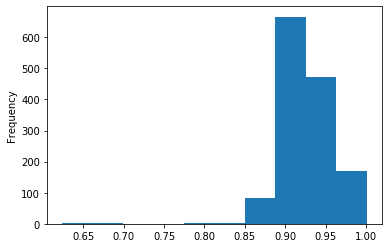

In [189]:
import matplotlib.pyplot as plt
df_trn['收率'].plot(kind='hist')
plt.show()

In [190]:
# 删除离群点
df_trn = df_trn.query('收率 > 0.8671').reset_index(drop=True)
df_trn = df_trn.query('收率 < 0.9861').reset_index(drop=True)

# 训练模型

In [191]:
# 指定的参数
def xgb_cv(train, test, params, fit_params, feature_names, nfold, seed):
    # 创建结果df
    train_pred = pd.DataFrame({
        'id': train['样本id'],
        'true': train['收率'],# 预测值
        'pred': np.zeros(len(train))})  
    # 测试提交结果
    test_pred = pd.DataFrame({'id': test['样本id'], 'pred': np.zeros(len(test))})
    # 交叉验证
    kfolder = KFold(n_splits=nfold, shuffle=True, random_state=seed) ## 通常3.5.10
    # 构造测试DMatrix   # 提升速度
    xgb_tst = xgb.DMatrix(data=test[feature_names])
    print('\n')
    # 遍历cv中每一折数据，通过索引来指定
    for fold_id, (trn_idx, val_idx) in enumerate(kfolder.split(train['收率'])):  ### 切分训练集
        # 构造当前训练的DMatrix
        xgb_trn = xgb.DMatrix(
            train.iloc[trn_idx][feature_names],
            train.iloc[trn_idx]['收率'])
        # 构造当前验证的DMatrix
        xgb_val = xgb.DMatrix(
            train.iloc[val_idx][feature_names],
            train.iloc[val_idx]['收率'])
        # 训练回归模型
        xgb_reg = xgb.train(params=params, dtrain=xgb_trn, **fit_params,
                  evals=[(xgb_trn, 'train'), (xgb_val, 'valid')])
        # 得到验证结果
        val_pred = xgb_reg.predict(
            xgb.DMatrix(train.iloc[val_idx][feature_names]),
            ntree_limit=xgb_reg.best_ntree_limit)
        train_pred.loc[val_idx, 'pred'] = val_pred
        # print(f'Fold_{fold_id}', mse(train.iloc[val_idx]['收率'], val_pred))
        test_pred['pred'] += xgb_reg.predict(
            xgb_tst, ntree_limit=xgb_reg.best_ntree_limit) / nfold
    print('\nCV LOSS:', mse(train_pred['true'], train_pred['pred']), '\n')
    return test_pred

设置训练参数

In [192]:
fit_params = {'num_boost_round': 10800,
              'verbose_eval': 300,
              'early_stopping_rounds': 360}
params_xgb = {'eta': 0.01, 'max_depth': 7, 'subsample': 0.8,  # 学习率eta，
              'booster': 'gbtree', 'colsample_bytree': 0.8,
              'objective': 'reg:linear', 'silent': True, 'nthread': 4}

In [120]:
# 开始训练
pred_xgb_a = xgb_cv(df_trn, df_tst, params_xgb, fit_params,df_trn.columns.tolist()[1:-1], 5, 0)

ValueError: feature_names must be unique

In [193]:
df_trn.to_csv('./train.csv')

In [194]:
df_tst.to_csv('./test.csv')

In [ ]:
# 测试集得到的结果

In [ ]:
# 得到预测结果
df_tst_a['收率'] = pred_xgb_a['pred'].values

In [ ]:
df_tst_a.head()